In [73]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression

import warnings

import csv

import datetime

import numpy as np



warnings.filterwarnings('ignore')

pd.plotting.register_matplotlib_converters()

In [74]:
df = pd.read_csv('data2.csv', parse_dates=['Timestamp'], encoding = 'utf-16')

df.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity
0,twitter,1552760166,Mooi verhaal over windmolens https://www.insta...,Null,1.0,0.0,0.70,1.00
1,twitter,1552995709,Het mooiste happy hour was afgelopen zaterdag....,Null,0.0,0.0,0.00,0.00
2,twitter,1553001655,Dus bij jou in de achtertuin windmolensvoortui...,Null,0.0,0.0,0.00,0.00
3,twitter,1552471319,Hoe kan provincie zorgen voor bouw van genoeg ...,Null,0.0,0.0,0.20,0.50
4,twitter,1552993305,We zijn geen communistisch land. Een vliegveld...,Null,0.0,0.0,0.19,0.58


In [75]:
df['Timestamp']= pd.to_datetime(df['Timestamp'], unit='s')

df.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity
0,twitter,2019-03-16 18:16:06,Mooi verhaal over windmolens https://www.insta...,Null,1.0,0.0,0.70,1.00
1,twitter,2019-03-19 11:41:49,Het mooiste happy hour was afgelopen zaterdag....,Null,0.0,0.0,0.00,0.00
2,twitter,2019-03-19 13:20:55,Dus bij jou in de achtertuin windmolensvoortui...,Null,0.0,0.0,0.00,0.00
3,twitter,2019-03-13 10:01:59,Hoe kan provincie zorgen voor bouw van genoeg ...,Null,0.0,0.0,0.20,0.50
4,twitter,2019-03-19 11:01:45,We zijn geen communistisch land. Een vliegveld...,Null,0.0,0.0,0.19,0.58


In [76]:
# remove outlier record

df = df.loc[df['Timestamp'] > '2007-01-01']

# FEATURE EXTRACTION

# month, for seasonality
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year

# days_since_first, for trend
df['days_since_first'] = 0
df['days_since_first'] = (df['Timestamp'] - min(df['Timestamp'])).dt.days



# create test design

train_filter = df['Timestamp'] < '2017-01-01'

df_train = df[train_filter]

df_test = df[(df['Timestamp'] > '2017-01-01') & (df['Timestamp'] < '2017-12-30')]

print(df_test)

      Origin           Timestamp  \
643  twitter 2017-12-29 14:59:44   
644  twitter 2017-12-27 09:47:37   
645  twitter 2017-12-27 07:55:01   
646  twitter 2017-12-26 12:04:14   
647  twitter 2017-12-26 09:07:14   
648  twitter 2017-12-19 15:23:02   
649  twitter 2017-12-15 13:09:13   
650  twitter 2017-12-14 22:55:29   
651  twitter 2017-12-14 21:44:05   
652  twitter 2017-12-14 21:12:05   
654  twitter 2017-12-14 15:52:12   
655  twitter 2017-12-14 12:55:11   
656  twitter 2017-12-13 15:06:03   
657  twitter 2017-12-12 21:22:04   
658  twitter 2017-12-12 19:08:47   
660  twitter 2017-12-12 06:35:44   
661  twitter 2017-12-10 18:14:18   
662  twitter 2017-12-05 08:58:04   
663  twitter 2017-12-05 07:45:35   
664  twitter 2017-12-05 07:09:29   
665  twitter 2017-12-04 18:51:18   
666  twitter 2017-12-01 13:25:31   
667  twitter 2017-11-30 09:08:20   
668  twitter 2017-11-29 16:37:23   
669  twitter 2017-11-23 18:22:02   
670  twitter 2017-11-22 21:31:08   
671  twitter 2017-11-22 16:3

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2732
Data columns (total 11 columns):
Origin              2569 non-null object
Timestamp           2569 non-null datetime64[ns]
Content             2569 non-null object
Title               2569 non-null object
Comment_count       2569 non-null float64
Retweet_count       2569 non-null float64
Polarity            2569 non-null float64
Subjectivity        2569 non-null float64
month               2569 non-null int64
year                2569 non-null int64
days_since_first    2569 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 240.8+ KB


In [78]:
print(df_train.count(), df_test.count())

Origin              1720
Timestamp           1720
Content             1720
Title               1720
Comment_count       1720
Retweet_count       1720
Polarity            1720
Subjectivity        1720
month               1720
year                1720
days_since_first    1720
dtype: int64 Origin              247
Timestamp           247
Content             247
Title               247
Comment_count       247
Retweet_count       247
Polarity            247
Subjectivity        247
month               247
year                247
days_since_first    247
dtype: int64


In [79]:
# define targets

target = 'Polarity'

y_train = df_train[target]

y_test = df_test[target]


x_train = np.column_stack((df_train['month'], df_train['Subjectivity'])).astype(int)
x_test = np.column_stack((df_test['month'], df_test['Subjectivity'])).astype(int)
y_test = df_test[target]

model = LinearRegression()

model.fit(x_train, y_train)

pred_train = model.predict(x_train)

pred_test = model.predict(x_test)

df_test['predictions'] = pred_test

df_test.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity,month,year,days_since_first,predictions
643,twitter,2017-12-29 14:59:44,De stroom die Nederland dit jaar produceerde m...,Null,7.0,73.0,0.700,1.000000,12,2017,3843,0.443888
644,twitter,2017-12-27 09:47:37,Windmolens draaien niet op wind maar op subsid...,Null,0.0,35.0,-0.100,0.100000,12,2017,3840,0.057565
645,twitter,2017-12-27 07:55:01,Iemand interesse in een paar eigen #windmolens...,Null,1.0,9.0,0.000,0.333333,12,2017,3840,0.057565
646,twitter,2017-12-26 12:04:14,Mooie innovatiestap: windmolens genereren 14% ...,Null,2.0,61.0,0.425,0.725000,12,2017,3839,0.057565
647,twitter,2017-12-26 09:07:14,En dat mopperen er zelfs nu nog mensen: 'windm...,Null,5.0,30.0,0.125,0.450000,12,2017,3839,0.057565


In [80]:
df.corr()

,Comment_count,Retweet_count,Polarity,Subjectivity,month,year,days_since_first
Comment_count,1.000000,0.647040,-0.002840,0.072814,0.014166,0.167124,0.171918
Retweet_count,0.647040,1.000000,0.003935,0.048564,0.005847,0.190919,0.195411
Polarity,-0.002840,0.003935,1.000000,0.228086,0.019913,0.011599,0.014080
Subjectivity,0.072814,0.048564,0.228086,1.000000,-0.001238,0.152434,0.154934
month,0.014166,0.005847,0.019913,-0.001238,1.000000,-0.225061,-0.117588
year,0.167124,0.190919,0.011599,0.152434,-0.225061,1.000000,0.994013
days_since_first,0.171918,0.195411,0.014080,0.154934,-0.117588,0.994013,1.000000


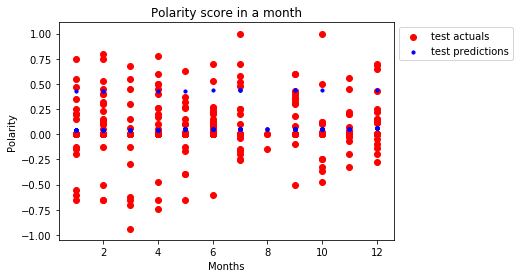

In [81]:
# plt.plot(df_train['Timestamp'], pred_train, label='train predictions', linestyle='--', color='blue')

# plt.plot(df_train['Timestamp'], y_train, label='train actuals', linestyle='-', color='blue'

plt.scatter( df_test['month'], y_test,label='test actuals', linestyle='-', color='red')

plt.scatter( df_test['month'], pred_test, label='test predictions', s=10, color='blue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# plt.xticks(rotation=30)

plt.ylabel(target)
plt.xlabel('Months')
plt.title('Polarity score in a month')

plt.show()


In [82]:
from sklearn.metrics import r2_score

r2_score(df_test['Polarity'], pred_test) 

0.10760454806910902